The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [36]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Start coding here!

In [37]:
# This line "defines" the name nobel
nobel = pd.read_csv('data/nobel.csv')

In [38]:
# Look at the first 5 rows
print(nobel.head())

   year    category  ... death_city death_country
0  1901   Chemistry  ...     Berlin       Germany
1  1901  Literature  ...   Châtenay        France
2  1901    Medicine  ...    Marburg       Germany
3  1901       Peace  ...     Heiden   Switzerland
4  1901       Peace  ...      Paris        France

[5 rows x 18 columns]


In [39]:
# Get the count of rows and columns
print(nobel.shape)

(1000, 18)


In [40]:
# Check Data Types and Non-Null Counts
nobel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5   laureate_id           1000 non-null   int64 
 6   laureate_type         1000 non-null   object
 7   full_name             1000 non-null   object
 8   birth_date            968 non-null    object
 9   birth_city            964 non-null    object
 10  birth_country         969 non-null    object
 11  sex                   970 non-null    object
 12  organization_name     736 non-null    object
 13  organization_city     735 non-null    object
 14  organization_country  735 non-null    object
 15  death_date            596 non-null    o

In [41]:
# Summary statistics for all numeric features
print(nobel.describe())

              year  laureate_id
count  1000.000000  1000.000000
mean   1973.721000   509.099000
std      34.523195   298.130617
min    1901.000000     1.000000
25%    1949.750000   250.750000
50%    1979.000000   500.500000
75%    2003.000000   764.250000
max    2023.000000  1034.000000


In [42]:
# Identify the top gender and country
top_gender = nobel['sex'].value_counts().index[0]
top_country = nobel['birth_country'].value_counts().index[0]

print(f"Top Gender: {top_gender}")
print(f"Top Country: {top_country}")

Top Gender: Male
Top Country: United States of America


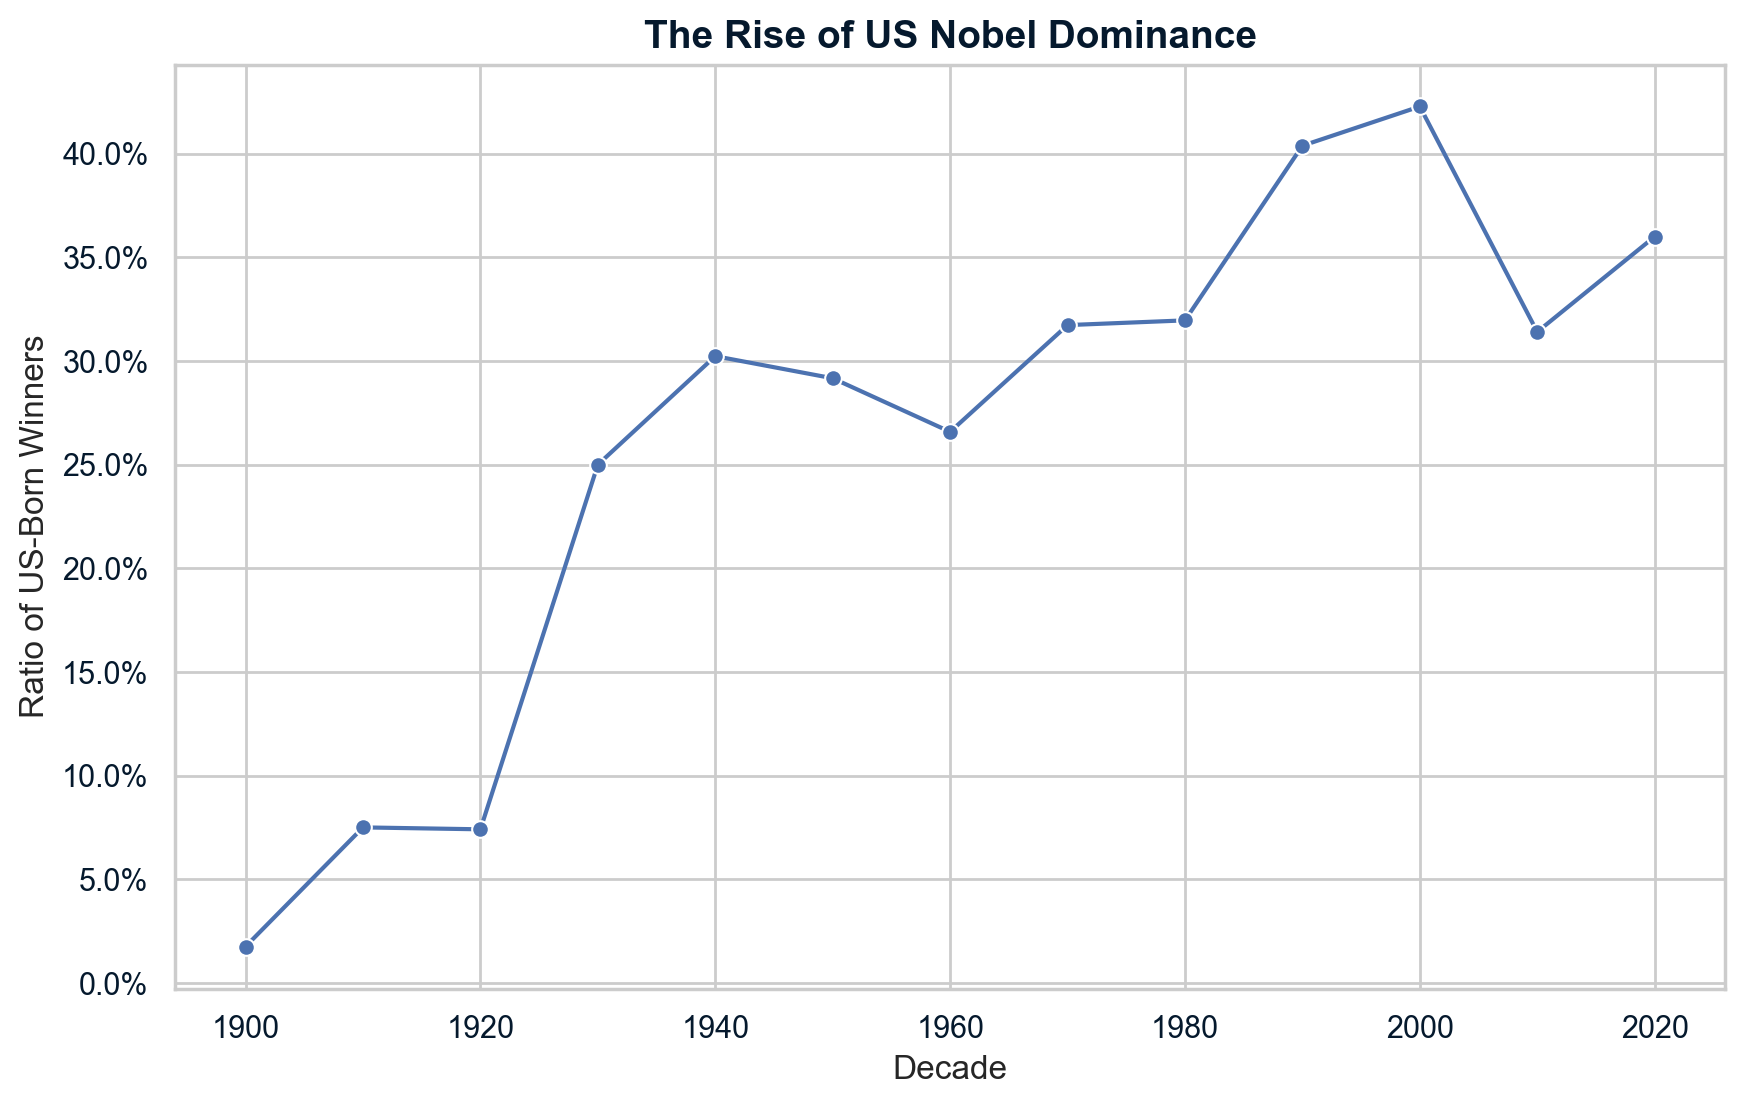

In [43]:
#Visualizing US Dominance

# Set the visual style (makes it look clean)
sns.set_theme(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=prop_usa_winners, x='decade', y='usa_born_winner', marker='o')

# Add titles and labels
plt.title('The Rise of US Nobel Dominance', fontsize=14, fontweight='bold')
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Ratio of US-Born Winners', fontsize=12)

# Format the Y-axis as a percentage for easier reading
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

plt.show()

In [44]:
#  Create a decade column
nobel['decade'] = (nobel['year'] // 10) * 10

In [45]:
# Create a boolean column for US-born winners
nobel['usa_born_winner'] = nobel['birth_country'] == 'United States of America'

In [46]:
#  Calculate the ratio per decade and find the max
prop_usa_winners = nobel.groupby('decade', as_index=False)['usa_born_winner'].mean()
max_decade_usa = prop_usa_winners[prop_usa_winners['usa_born_winner'] == prop_usa_winners['usa_born_winner'].max()]['decade'].values[0]

print(f"Highest US Ratio Decade: {max_decade_usa}")

Highest US Ratio Decade: 2000


In [47]:
# Create a boolean for female winners
nobel['female_winner'] = nobel['sex'] == 'Female'

In [48]:
# Group by decade and category
prop_female_winners = nobel.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()

In [49]:
# Find the max row
max_female_row = prop_female_winners[prop_female_winners['female_winner'] == prop_female_winners['female_winner'].max()]


In [50]:
# Store as a dictionary
max_female_dict = {max_female_row['decade'].values[0]: max_female_row['category'].values[0]}

print(f"Max Female Proportion: {max_female_dict}")

Max Female Proportion: {2020: 'Literature'}


In [51]:
# Filter for female winners
female_winners = nobel[nobel['sex'] == 'Female']

In [52]:
# Find the row with the earliest year
first_woman = female_winners[female_winners['year'] == female_winners['year'].min()]

In [53]:
first_woman_name = first_woman['full_name'].values[0]
first_woman_category = first_woman['category'].values[0]

print(f"First Woman: {first_woman_name} in {first_woman_category}")

First Woman: Marie Curie, née Sklodowska in Physics


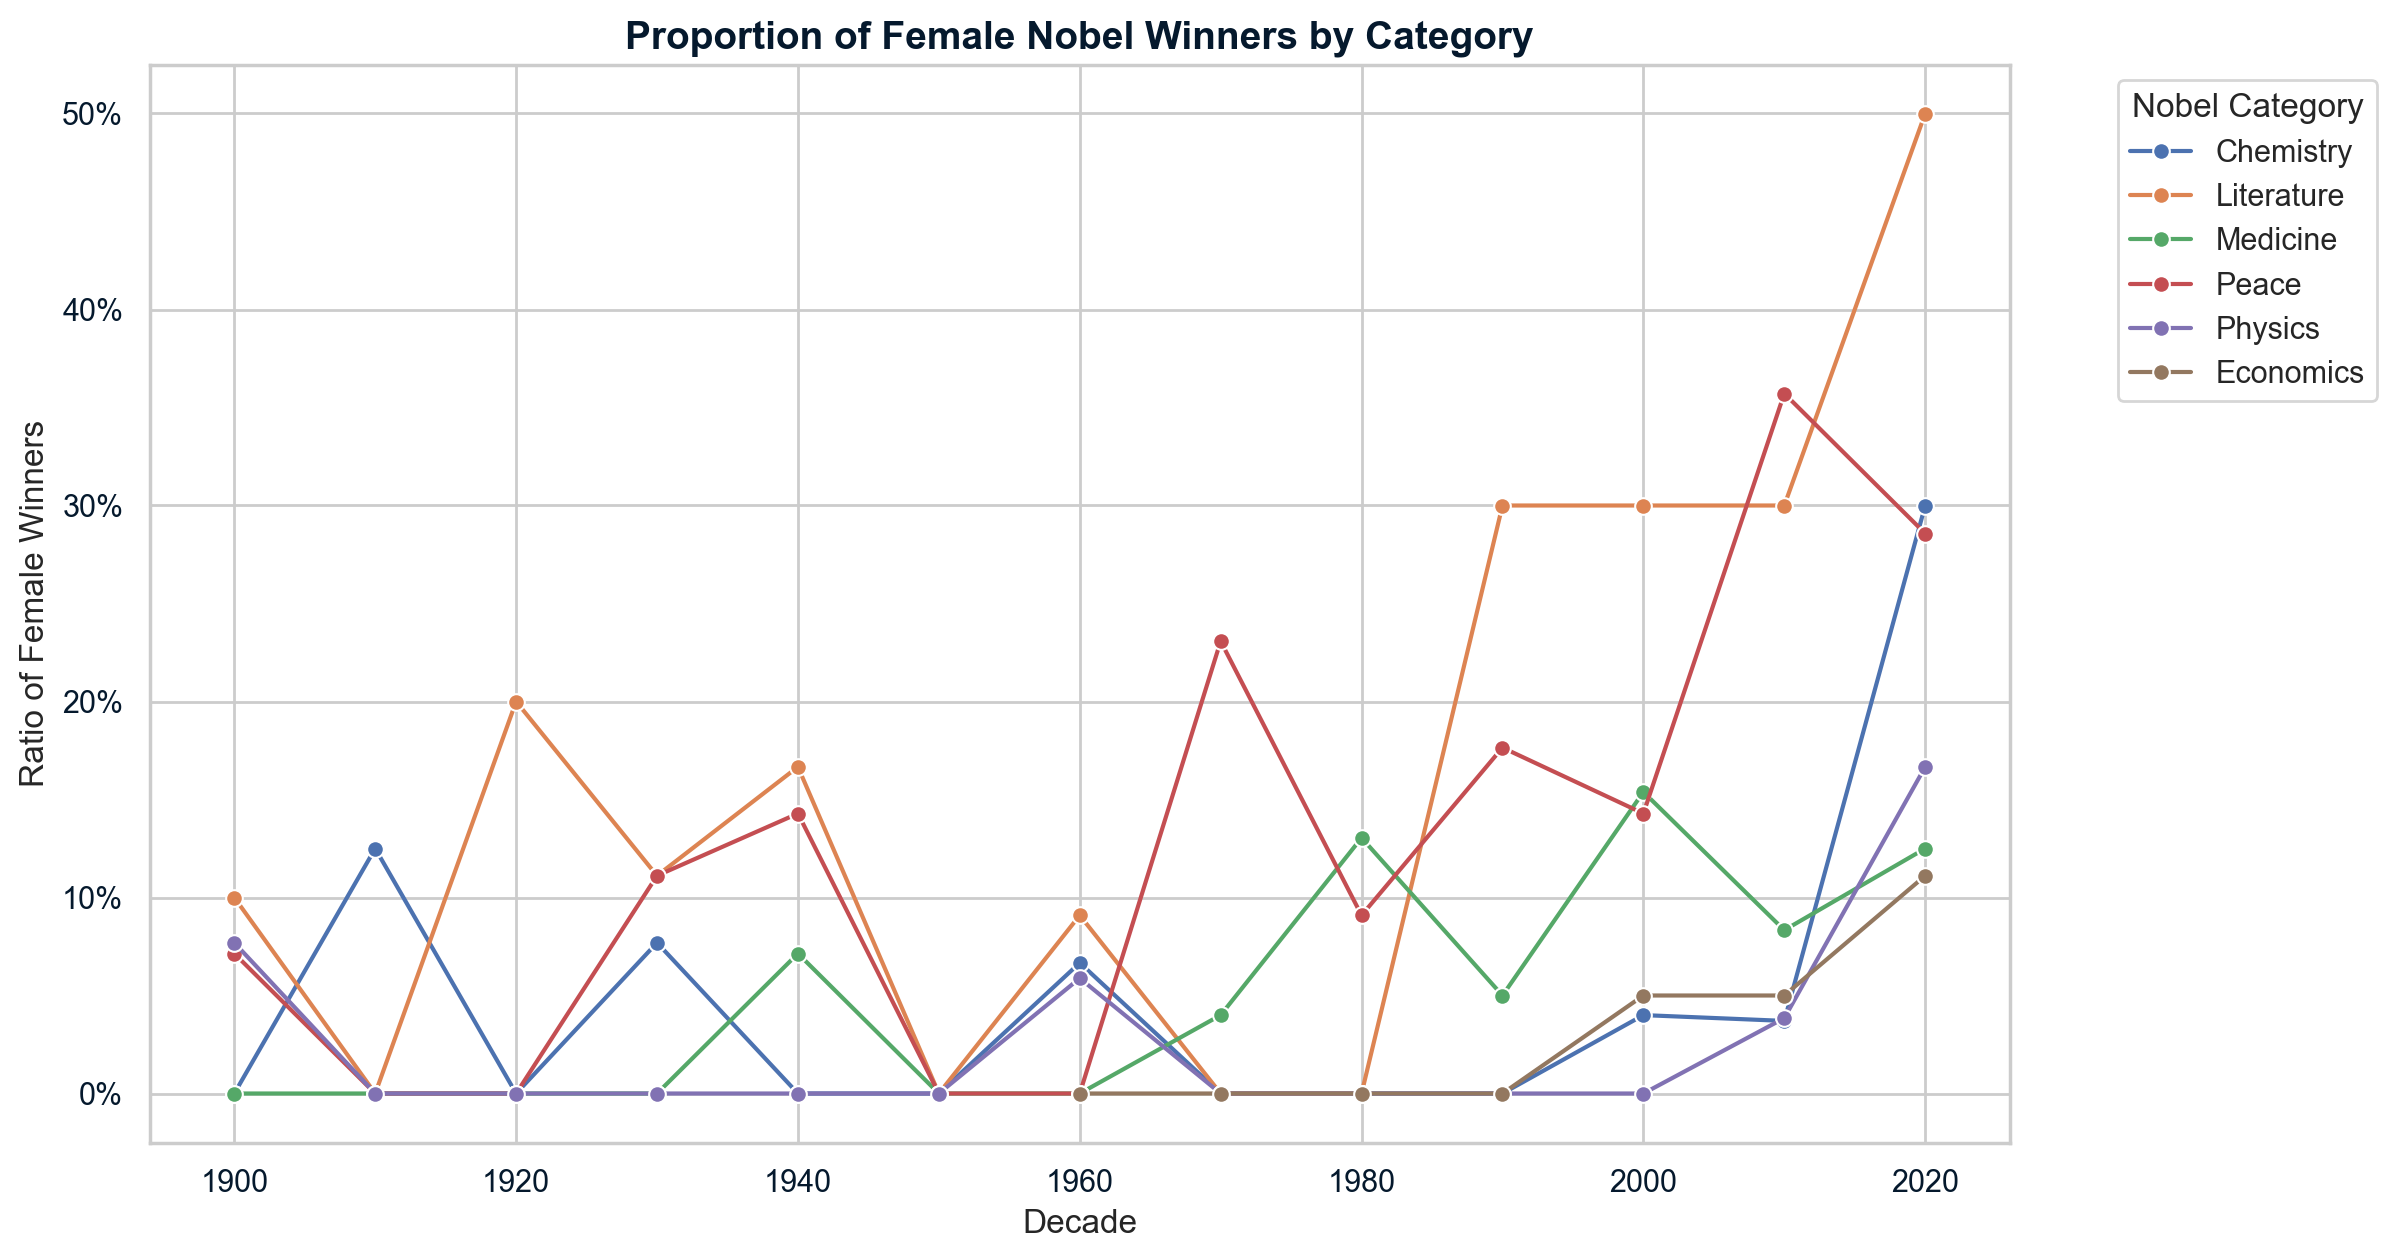

In [54]:
#Evolution of Female Laureates by Category

# Create the data subset (Prop of women per decade AND category)
prop_female_winners = nobel.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()

# Plotting with 'hue' to separate the categories by color
plt.figure(figsize=(12, 7))
sns.lineplot(data=prop_female_winners, x='decade', y='female_winner', hue='category', marker='o')

# Customizing the layout
plt.title('Proportion of Female Nobel Winners by Category', fontsize=14, fontweight='bold')
plt.ylabel('Ratio of Female Winners', fontsize=12)
plt.xlabel('Decade', fontsize=12)

# Move the legend outside so it doesn't cover the lines
plt.legend(title='Nobel Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Format Y-axis as percentage
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))

plt.show()

In [55]:
# Count occurrences of each full name
counts = nobel['full_name'].value_counts()

In [56]:
# Filter for those with more than 1 win and convert to a list
repeat_list = list(counts[counts >= 2].index)

print(f"Repeat Winners: {repeat_list}")

Repeat Winners: ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']
